# 📝 Exercise M4.05
In the previous notebook we set `penalty="none"` to disable regularization
entirely. This parameter can also control the **type** of regularization to use,
whereas the regularization **strength** is set using the parameter `C`.
Setting`penalty="none"` is equivalent to an infinitely large value of `C`.
In this exercise, we ask you to train a logistic regression classifier using the
`penalty="l2"` regularization (which happens to be the default in scikit-learn)
to find by yourself the effect of the parameter `C`.

We will start by loading the dataset and create the helper function to show
the decision separation as in the previous code.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [9]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")
# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [10]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

First, let's create our predictive model.

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2"))

In [12]:
logistic_regression.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

Given the following candidates for the `C` parameter, find out the impact of
`C` on the classifier decision boundary. You can import the helper class with
`from helpers.plotting import DecisionBoundaryDisplay` to plot the decision
function boundary. Use the method `from_estimator` from this class.

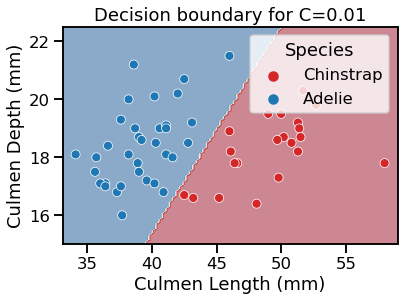

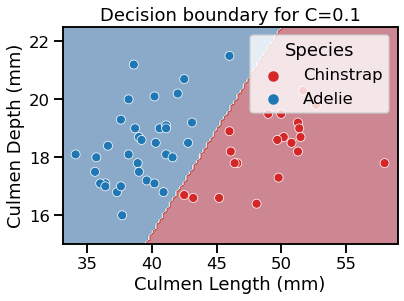

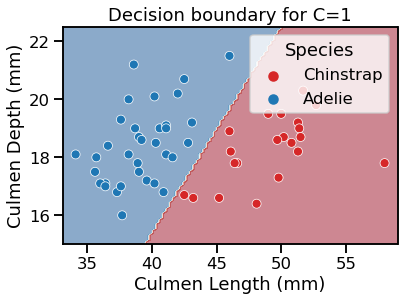

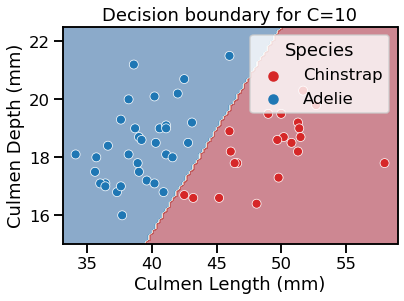

In [22]:
from helpers.plotting import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import seaborn as sns

Cs = [0.01, 0.1, 1, 10]

for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    
    classifier = LogisticRegression().fit(data_train, target_train)

    DecisionBoundaryDisplay.from_estimator(
    classifier, data_test, response_method="predict", 
        cmap="RdBu_r", alpha=0.5)
        
    sns.scatterplot(
    data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
    hue=target_column, palette=["tab:red", "tab:blue"])
    _ = plt.title(f"Decision boundary for C={C}" )

Look at the impact of the `C` hyperparameter on the magnitude of the weights.

In [23]:
for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    
    classifier = LogisticRegression().fit(data_train, target_train)
    
    print(classifier.coef_)

[[ 1.21094942 -1.70051619]]
[[ 1.21094942 -1.70051619]]
[[ 1.21094942 -1.70051619]]
[[ 1.21094942 -1.70051619]]
